In [4]:
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# read in and format data
def strToFloat(data):
    stringNums = {string: i for i, string in enumerate(set(data))}
    return np.array([stringNums[d] for d in data])

raw_df = pd.read_csv("data.csv")
df = pd.DataFrame()

# convert strings to integer classes
for col in raw_df.columns:
    if raw_df[col].dtype == np.dtype('O'):
        df[col] = strToFloat(raw_df[col])
    else:
        df[col] = raw_df[col]

del raw_df

# replace NaNs (missing values) with -1
df[np.isnan(df)] = -1

#classify yards gained/lost
gnls = np.array(df["GN/LS"])
gnls[gnls <= 0] = 0
gnls[gnls < 10] = 1
gnls[gnls >= 10] = 2
df["GN/LS"] = gnls
        
#drop RESULT of play, since RESULT only describesthe yard/gain/loss
df = df.drop("RESULT", 1)

#drop opponent team name
df = df.drop("OPP TEAM", 1)

#drop PLAY NUMBER
df = df.drop("PLAY #", 1)

#DROP ODK (not needed, plus it's importance is 0)
df = df.drop("ODK", 1)

train, test = train_test_split(df, test_size=0.2)

y_train = train["GN/LS"]
x_train = train
del x_train["GN/LS"]

y_test = test["GN/LS"]
x_test = test
del x_test["GN/LS"]


In [5]:

RFC = ensemble.RandomForestClassifier(n_estimators=1000, n_jobs=-1)
RFC.fit(x_train, y_train)

predicted = RFC.predict(x_test)
actual = np.array(y_test)


In [6]:
correlation = np.corrcoef(np.array([predicted, actual]))[0, 1]
print("Correlation: ", correlation)

('Correlation: ', 0.16502941877759925)


In [7]:
#get list of features, ranked by importance
importances = RFC.feature_importances_

In [8]:
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
    
#feature 3 is YARD LN, feature 7 is RESULT, feature 9 is OFF PLAY
#feature 6 is PASS ZONE, feature 13 is COVERAGE, feature 1 is DIST
#feature 11 is DEF FRONT, feature 8 is OFF FORM, feature 0 is DN
#etc...

1. feature 3 (0.162385)
2. feature 8 (0.145654)
3. feature 12 (0.104657)
4. feature 1 (0.083925)
5. feature 6 (0.081972)
6. feature 7 (0.061099)
7. feature 10 (0.057326)
8. feature 0 (0.053290)
9. feature 2 (0.048277)
10. feature 13 (0.046500)
11. feature 9 (0.037165)
12. feature 5 (0.036824)
13. feature 11 (0.029703)
14. feature 4 (0.024361)
15. feature 15 (0.014373)
16. feature 14 (0.012489)


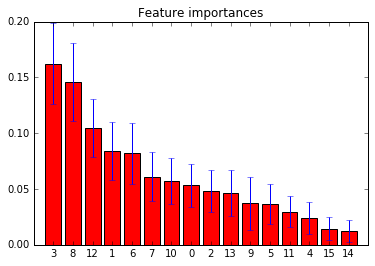

In [9]:
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
            axis=0)
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color = "r",
             yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()